I'm going to be showcasing an example of a waffle chart using [pywaffle](https://github.com/gyli/PyWaffle).  I got data from [Baseball Savant](https://baseballsavant.mlb.com/).  I am going to compare the distribution of pitches that Justin Verlander threw in 2009 vs 2019. 

To start I'm going to compare the distributions using a pie chart. 

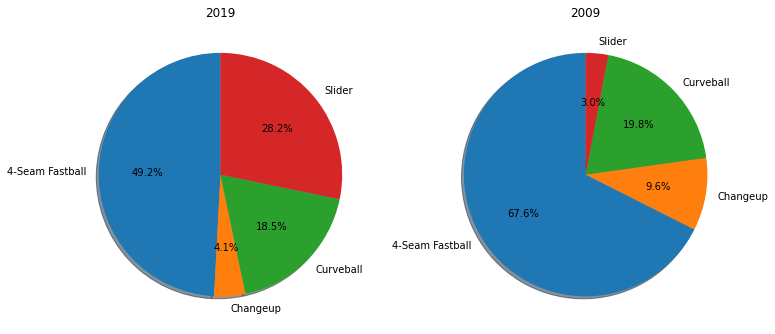

In [18]:
import matplotlib.pyplot as plt

labels = df_19['pitch_name'].value_counts(normalize = True).sort_index().index
vals_2019 = df_19['pitch_name'].value_counts(normalize = True).sort_index().values
vals_2009 = df_09['pitch_name'].value_counts(normalize = True).sort_index().values

fig1, ax = plt.subplots(ncols = 2, figsize = (12, 8))
ax[0].pie(vals_2019, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0].set_title('2019')
ax[1].pie(vals_2009, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('2009');

We see that the amount of fastballs decreased significantly between 2019 vs 2009.  Now lets use the same data using pywaffle.  To start I am going to put all my data into a pandas dataframe. 

In [19]:
data = pd.DataFrame(
    {
        'labels': df_19['pitch_name'].value_counts(normalize = True).sort_index().index,
        '2019': df_19['pitch_name'].value_counts(normalize = True).sort_index(),
        '2009': df_09['pitch_name'].value_counts(normalize = True).sort_index(),
    },
).set_index('labels')
data

,2019,2009
labels,,
4-Seam Fastball,0.491639,0.675648
Changeup,0.041350,0.096484
Curveball,0.184555,0.198101
Slider,0.282457,0.029766


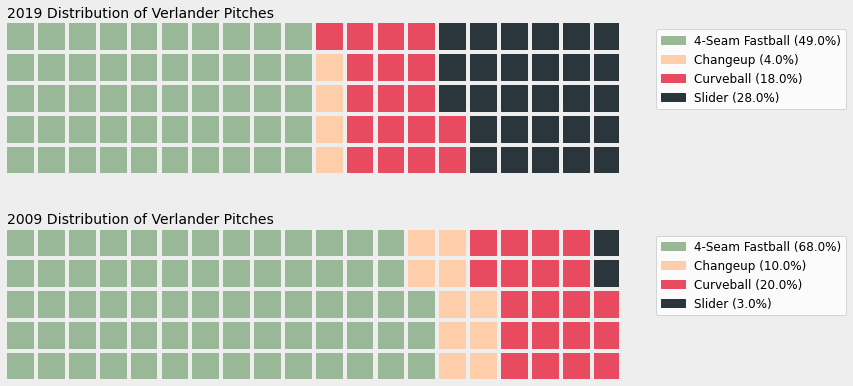

In [20]:
from pywaffle import Waffle
import numpy as np

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '211': {
            'values': data['2019'] * 100,
            'labels': [f"{n} ({np.round(v*100)}%)" for n, v in data['2019'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '2019 Distribution of Verlander Pitches', 'loc': 'left', 'fontsize': 14}
        },
        '212': {
            'values': data['2009'] * 100,
            'labels': [f"{n} ({np.round(v*100)}%)" for n, v in data['2009'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '2009 Distribution of Verlander Pitches', 'loc': 'left', 'fontsize': 14}
        },
    },
    rows=5,  # shared parameter among subplots
    colors=("#99B898", "#FECEAB", "#E84A5F", "#2A363B"),  # shared parameter among subplots
    figsize=(12, 6)  # figsize is a parameter of plt.figure
)
fig.set_facecolor('#EEEEEE')

To me the waffle chart makes it much more clearly to see how the distributions have changed.  I see fastballs and changeups have decreased while slides have increased.  There are more examples on the [github page](https://github.com/gyli/PyWaffle).